In [10]:
# -------------- Librerias --------------
import yfinance as yf
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [11]:
# Definimos el total de días hacia atras
dias = 1010

# Definir el ticker de Tesla y la fecha inicial
ticker = "TSLA"

# Definimos la fecha de inicio
start_date = datetime.datetime.now() - datetime.timedelta(days=dias)

# Obtener los datos del ticker desde Yahoo Finance
tesla_data = yf.download(ticker, start=start_date)

# Seleccion de la columna a trabajar
serie = tesla_data.Close

# Grafica
px.line(serie)

[*********************100%***********************]  1 of 1 completed


In [12]:
def movimiento_browniano(data : pd.core.frame.DataFrame, dias_despues : int, sd : int) -> pd.Series:
    # Seleccionmos la columna a trabajar
    serie = data.Close
    
    # Calcular los retornos diarios
    # retornos_diarios = (serie - serie.shift(1)) / serie.shift(1)
    retornos_diarios = np.log(serie/serie.shift(1))
    
    # Calculo de la media y varianza de los retornos diarios
    mu = np.mean(retornos_diarios)
    std = np.std(retornos_diarios)
    
    # Inicializamos la caminata aleatoria
    precio_inicial = serie.iloc[0]
    
    # Definir el número de días para predecir en el futuro
    dias_futuros = np.shape(serie)[0] + int(dias_despues/2)
    
    # Calcular el precio futuro
    precio_futuro = np.zeros(dias_futuros)
    precio_futuro[0] = precio_inicial
    
    # Fijamos una semilla
    np.random.seed(sd)

    for dia in range(1, dias_futuros):
        # Generar un número aleatorio a partir de una distribución normal
        z = np.random.normal(loc=0, scale=1)
        
        # Calcular el precio simulado para el día actual
        crecimiento = mu - 0.5 * std ** 2
        volatilidad_z = std * z
        precio_simulado = precio_futuro[dia - 1] * np.exp(crecimiento + volatilidad_z)
        # Calcular el precio simulado para el día actual
        # precio_simulado = precio_futuro[dia - 1] * (1 + mu + std * z)
        
        # Asignar el precio simulado al array de precios simulados
        precio_futuro[dia] = precio_simulado
        
    fechas = pd.date_range(start=start_date, periods=dias_futuros, freq='D')
    prediccion = pd.Series(precio_futuro, index = fechas)
    
    return prediccion

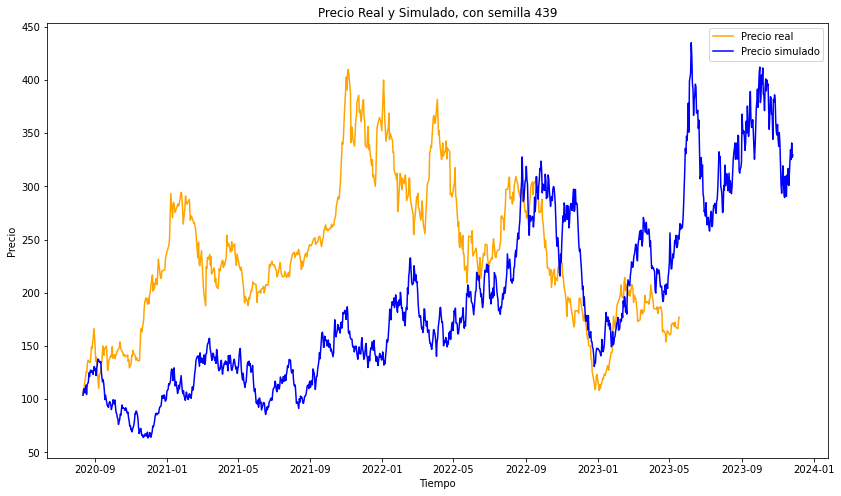

In [13]:
# for i in range(2**32 -1):
# seed = 199, 134, 301, 409, 6721803, 23185
predict = movimiento_browniano(tesla_data, dias, 439)
# Graficar los precios simulados y los precios reales
fig, ax = plt.subplots(ncols=1,figsize=(14, 8))
ax.plot(serie, label='Precio real',color='orange')
ax.plot(predict,label='Precio simulado', color= 'blue')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Precio')
plt.legend()
# plt.title(f'semilla {199}')
ax.set_title(f'Precio Real y Simulado, con semilla {439}')
plt.show()

In [14]:
fig1 = px.line(serie)
fig2 = px.line(predict)
fig = go.Figure(data= fig1.data + fig2.data)
fig.show()

In [26]:
def error_medio(predicho, real):
    n = np.shape(real)[0]
    predicho = predicho[:n]
    f = list()
        
    for i in range(n):
        f.append((predicho[i] - real[i]) ** 2)
        
    return np.sum(np.array(f) / n )